# Himmelblau function

The Himmelblau function is multi modal objective function with four identical local minima.
$x^{2}+y-11)^{2}+(x+y^{2}-7)^{2}$
- $(3,2)$
- $(−2.805118, 3.283186)$
- $(−3.779310, −3.283186)$
- $(3.584458, −1.848126)$

Here we modify it so that $(3,2)$ is the global minimum, while the other three global minimma becomee local minima.

$x^{2}+y-11)^{2}+(x+y^{2}-7)^{2} + ((x-3)^2+(x-2)^2)$

Thus depending on the starting model optimiser can get stuck in one of the three local minima and not reach the global minimum. In comparison global search methods such as Border Collie Optimisation can find the global minimum.


## Further reading
- T. Dutta, S. Bhattacharyya, S. Dey and J. Platos, "Border Collie Optimization," in IEEE Access, vol. 8, pp. 109177-109197, 2020, doi: 10.1109/ACCESS.2020.2999540


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.animation import FuncAnimation

import arviz as az

from cofi import BaseProblem, InversionOptions, Inversion
from cofi.utils import QuadraticReg

np.random.seed(42)

In [2]:
def himmelblau(x): 
    return (x[0]**2+x[1]-11)**2+(x[0]+x[1]**2-7)**2+((x[0]-3)**2+(x[0]-2)**2)

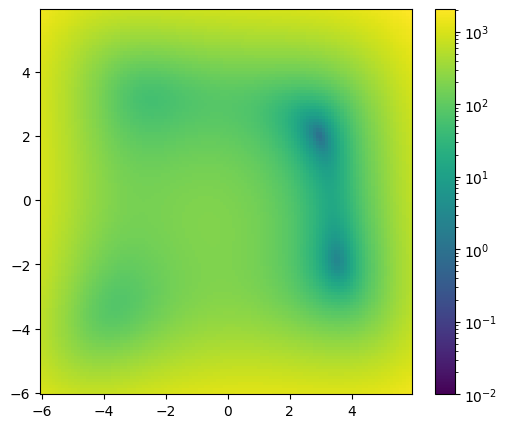

In [3]:
# Initialize figure 
fig = plt.figure(figsize=(6, 5))
ax = fig.gca()

# Evaluate function
X = np.arange(-6, 6, 0.1)
Y = np.arange(-6, 6, 0.1)
X, Y = np.meshgrid(X, Y)
Z = himmelblau([X,Y])
im = ax.pcolor(X,Y,Z, norm=colors.LogNorm(vmin=10**-2, vmax=Z.max()))
fig.colorbar(im)

In [4]:
# Define the Base Problem
inv_problem = BaseProblem()
inv_problem.name = "Himmelblau Function"
inv_problem.set_objective(himmelblau)
inv_problem.set_model_shape((2))
inv_problem.set_initial_model([-1,-1])

## BFGS
Use BFGS and the $(-1,-1)$ as the intial model which will result in local minimum being found.

In [5]:
# Define the inverse options
inv_options = InversionOptions()
inv_options.set_tool("scipy.optimize.minimize")

# Run the inversion
inv = Inversion(inv_problem, inv_options)
inv_result = inv.run()
inv_result.summary()

Summary for inversion result
SUCCESS
----------------------------
fun: 76.33001319459537
jac: [-5.7220459e-06 -5.7220459e-06]
hess_inv: [[0.01129199 0.00382335]
 [0.00382335 0.01349229]]
nfev: 51
njev: 17
status: 0
message: Optimization terminated successfully.
nit: 9
model: [-3.52924475 -3.20257629]


## Border collie optimisation

Use CofI's implemntation of Border Collie optimisation.

In [6]:
inv_problem = BaseProblem()
inv_problem.name = "Himmelblau Function"
inv_problem.set_objective(himmelblau)
inv_problem.set_model_shape((2))

In [7]:
# Define the inverse options
bounds= ((-6.0,6.0),(-6.0,6.0))

inv_problem.set_bounds(bounds)

inv_options = InversionOptions()
inv_options.set_params(number_of_iterations=100)
inv_options.set_tool("cofi.border_collie_optimization")

# Run the inversion
inv = Inversion(inv_problem, inv_options)
inv_result = inv.run()

In [8]:
inv_result.model

array([2.89626109, 1.97710403])

Plotting the states of the flock and pack. We can observe how the lead dog goes to a minimum (i.e. the farm) and once it has arrived theere it runs away to gather more sheep.

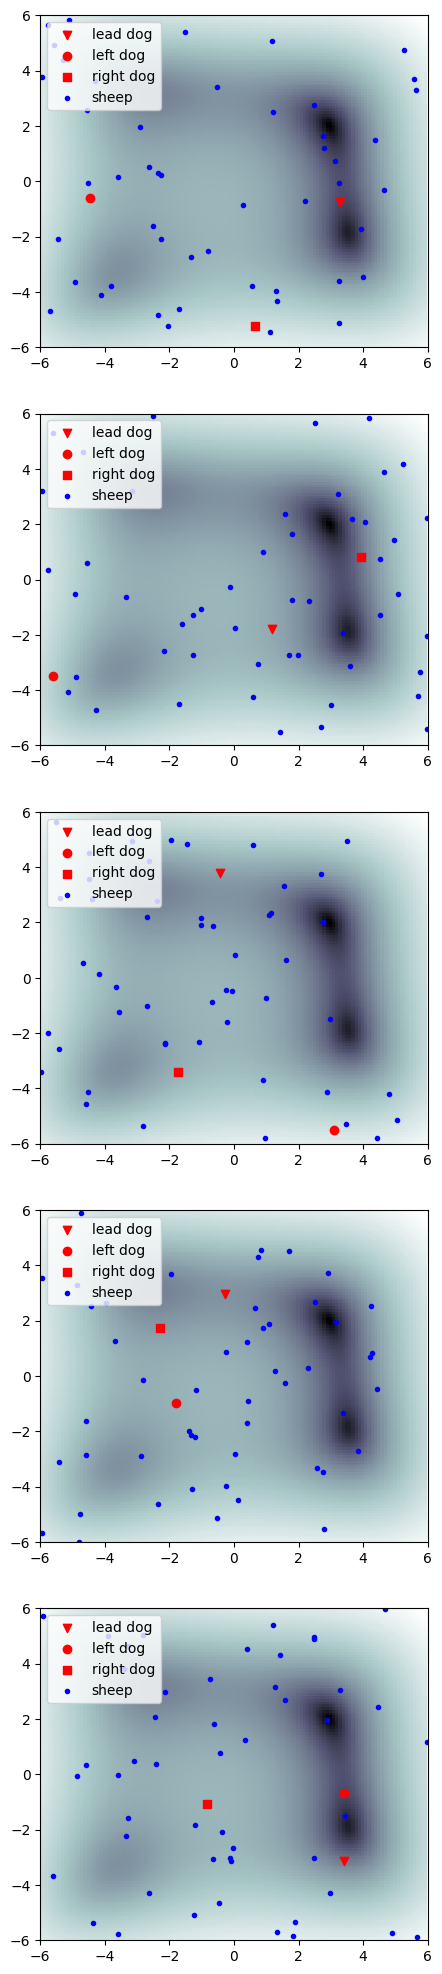

In [9]:
n=len(inv_result.pack_position_history)
fig, ax = plt.subplots(n, 1)
fig.set_size_inches(5,5*n)
dmarkers=["v","o","s"]
dlabels=["lead dog","left dog","right dog"]
for i in range(n):
    ax[i].pcolor(X,Y,np.log(Z),cmap=plt.cm.bone)
    # Plot that point using the x and y coordinates
    pack=inv_result.pack_position_history[i]
    flock=inv_result.flock_position_history[i]
    dmarkers
    for j,dog in enumerate(pack):
        ax[i].scatter(dog[0],dog[1], color='red', label=dlabels[j], marker=dmarkers[j])
    for j,sheep in enumerate(flock):
        if j==0:
            ax[i].scatter(sheep[0],sheep[1], label="sheep",color='blue', marker='.')
        else:
            ax[i].scatter(sheep[0],sheep[1], color='blue', marker='.')

    # Set the x and y axis to display a fixed range.
    ax[i].set_xlim([-6, 6])
    ax[i].set_ylim([-6, 6])
    ax[i].legend(loc='upper left')